<h2><a href="https://leetcode.com/problems/maximum-population-year/">1854. Maximum Population Year</a></h2><h3>Easy</h3><hr><p>You are given a 2D integer array <code>logs</code> where each <code>logs[i] = [birth<sub>i</sub>, death<sub>i</sub>]</code> indicates the birth and death years of the <code>i<sup>th</sup></code> person.</p>

<p>The <strong>population</strong> of some year <code>x</code> is the number of people alive during that year. The <code>i<sup>th</sup></code> person is counted in year <code>x</code>&#39;s population if <code>x</code> is in the <strong>inclusive</strong> range <code>[birth<sub>i</sub>, death<sub>i</sub> - 1]</code>. Note that the person is <strong>not</strong> counted in the year that they die.</p>

<p>Return <em>the <strong>earliest</strong> year with the <strong>maximum population</strong></em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> logs = [[1993,1999],[2000,2010]]
<strong>Output:</strong> 1993
<strong>Explanation:</strong> The maximum population is 1, and 1993 is the earliest year with this population.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> logs = [[1950,1961],[1960,1971],[1970,1981]]
<strong>Output:</strong> 1960
<strong>Explanation:</strong> 
The maximum population is 2, and it had happened in years 1960 and 1970.
The earlier year between them is 1960.</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= logs.length &lt;= 100</code></li>
	<li><code>1950 &lt;= birth<sub>i</sub> &lt; death<sub>i</sub> &lt;= 2050</code></li>
</ul>


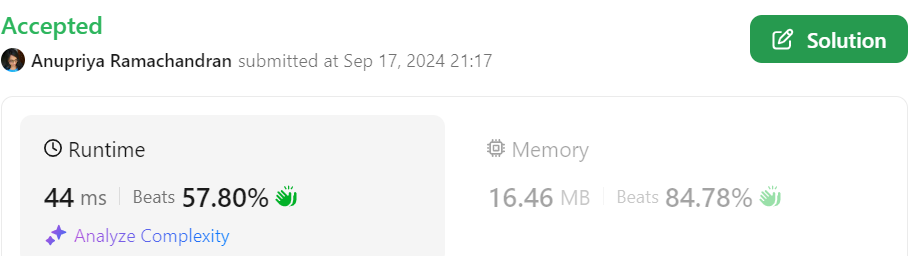

<p> <strong>Linesweep Algorithm :  </strong> If we are given a range(start and end) we add 1 at its start and minus 1 after its end</p>

In [ ]:
# we subtract 1950 to get smaller index, since from the constraints 
# we know the year given starts from 1950, then 101 => 2051- 1950
class Solution:
    def maximumPopulation(self, logs: List[List[int]]) -> int:
        count_map = [0] * 101

    # linesweep algorithm where if we are given a range(start and end) we add 1 at its start and minus 1 after its end, 
    # here we taking the death year itself since its excluded.
        for log in logs:
            count_map[log[0] - 1950] += 1
            count_map[log[1] - 1950] -= 1
        

        current_population, max_population = 0, 0
        year = 0

        # taking prefix sum, since we know each person born will be counted until his death year, 
        # so when taking prefix sum previous years population is also accounted along with the current year population
        for i in range(101):
            current_population += count_map[i]    

            # keeping check of max population until the current year
            if current_population > max_population:
                max_population = current_population
                year = i  + 1950   

        return year